# Explore here

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep= ";")

# Carga de datos

In [344]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [345]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Analisis multivariable

In [346]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [348]:
data.shape
rangos = data.max() - data.min()
print(rangos)

fixed acidity            11.30000
volatile acidity          1.46000
citric acid               1.00000
residual sugar           14.60000
chlorides                 0.59900
free sulfur dioxide      71.00000
total sulfur dioxide    283.00000
density                   0.01362
pH                        1.27000
sulphates                 1.67000
alcohol                   6.50000
quality                   5.00000
dtype: float64


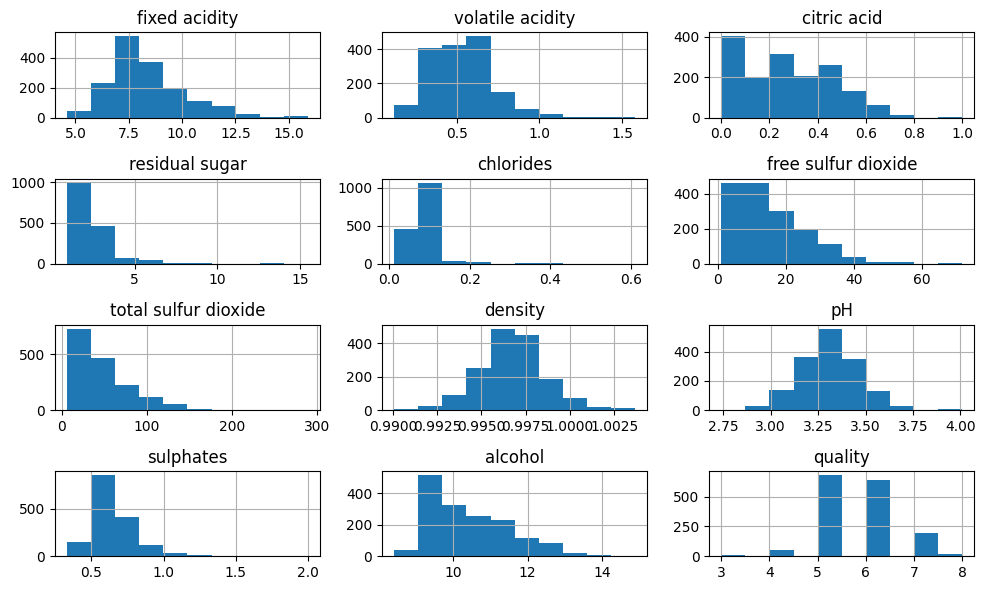

In [349]:
data.hist(figsize=(10, 6))  # Cambia el tamaño como desees
plt.tight_layout()
plt.show()


Como podemos darnos cuenta, la columna quality que es nuestra variable a predecir tenemos casos muy desvalanceados. Por lo que si queremos un buen modelo es necesario que balancemos los datos, para que no se ve afectado en la clasificacion nuestro modelo.

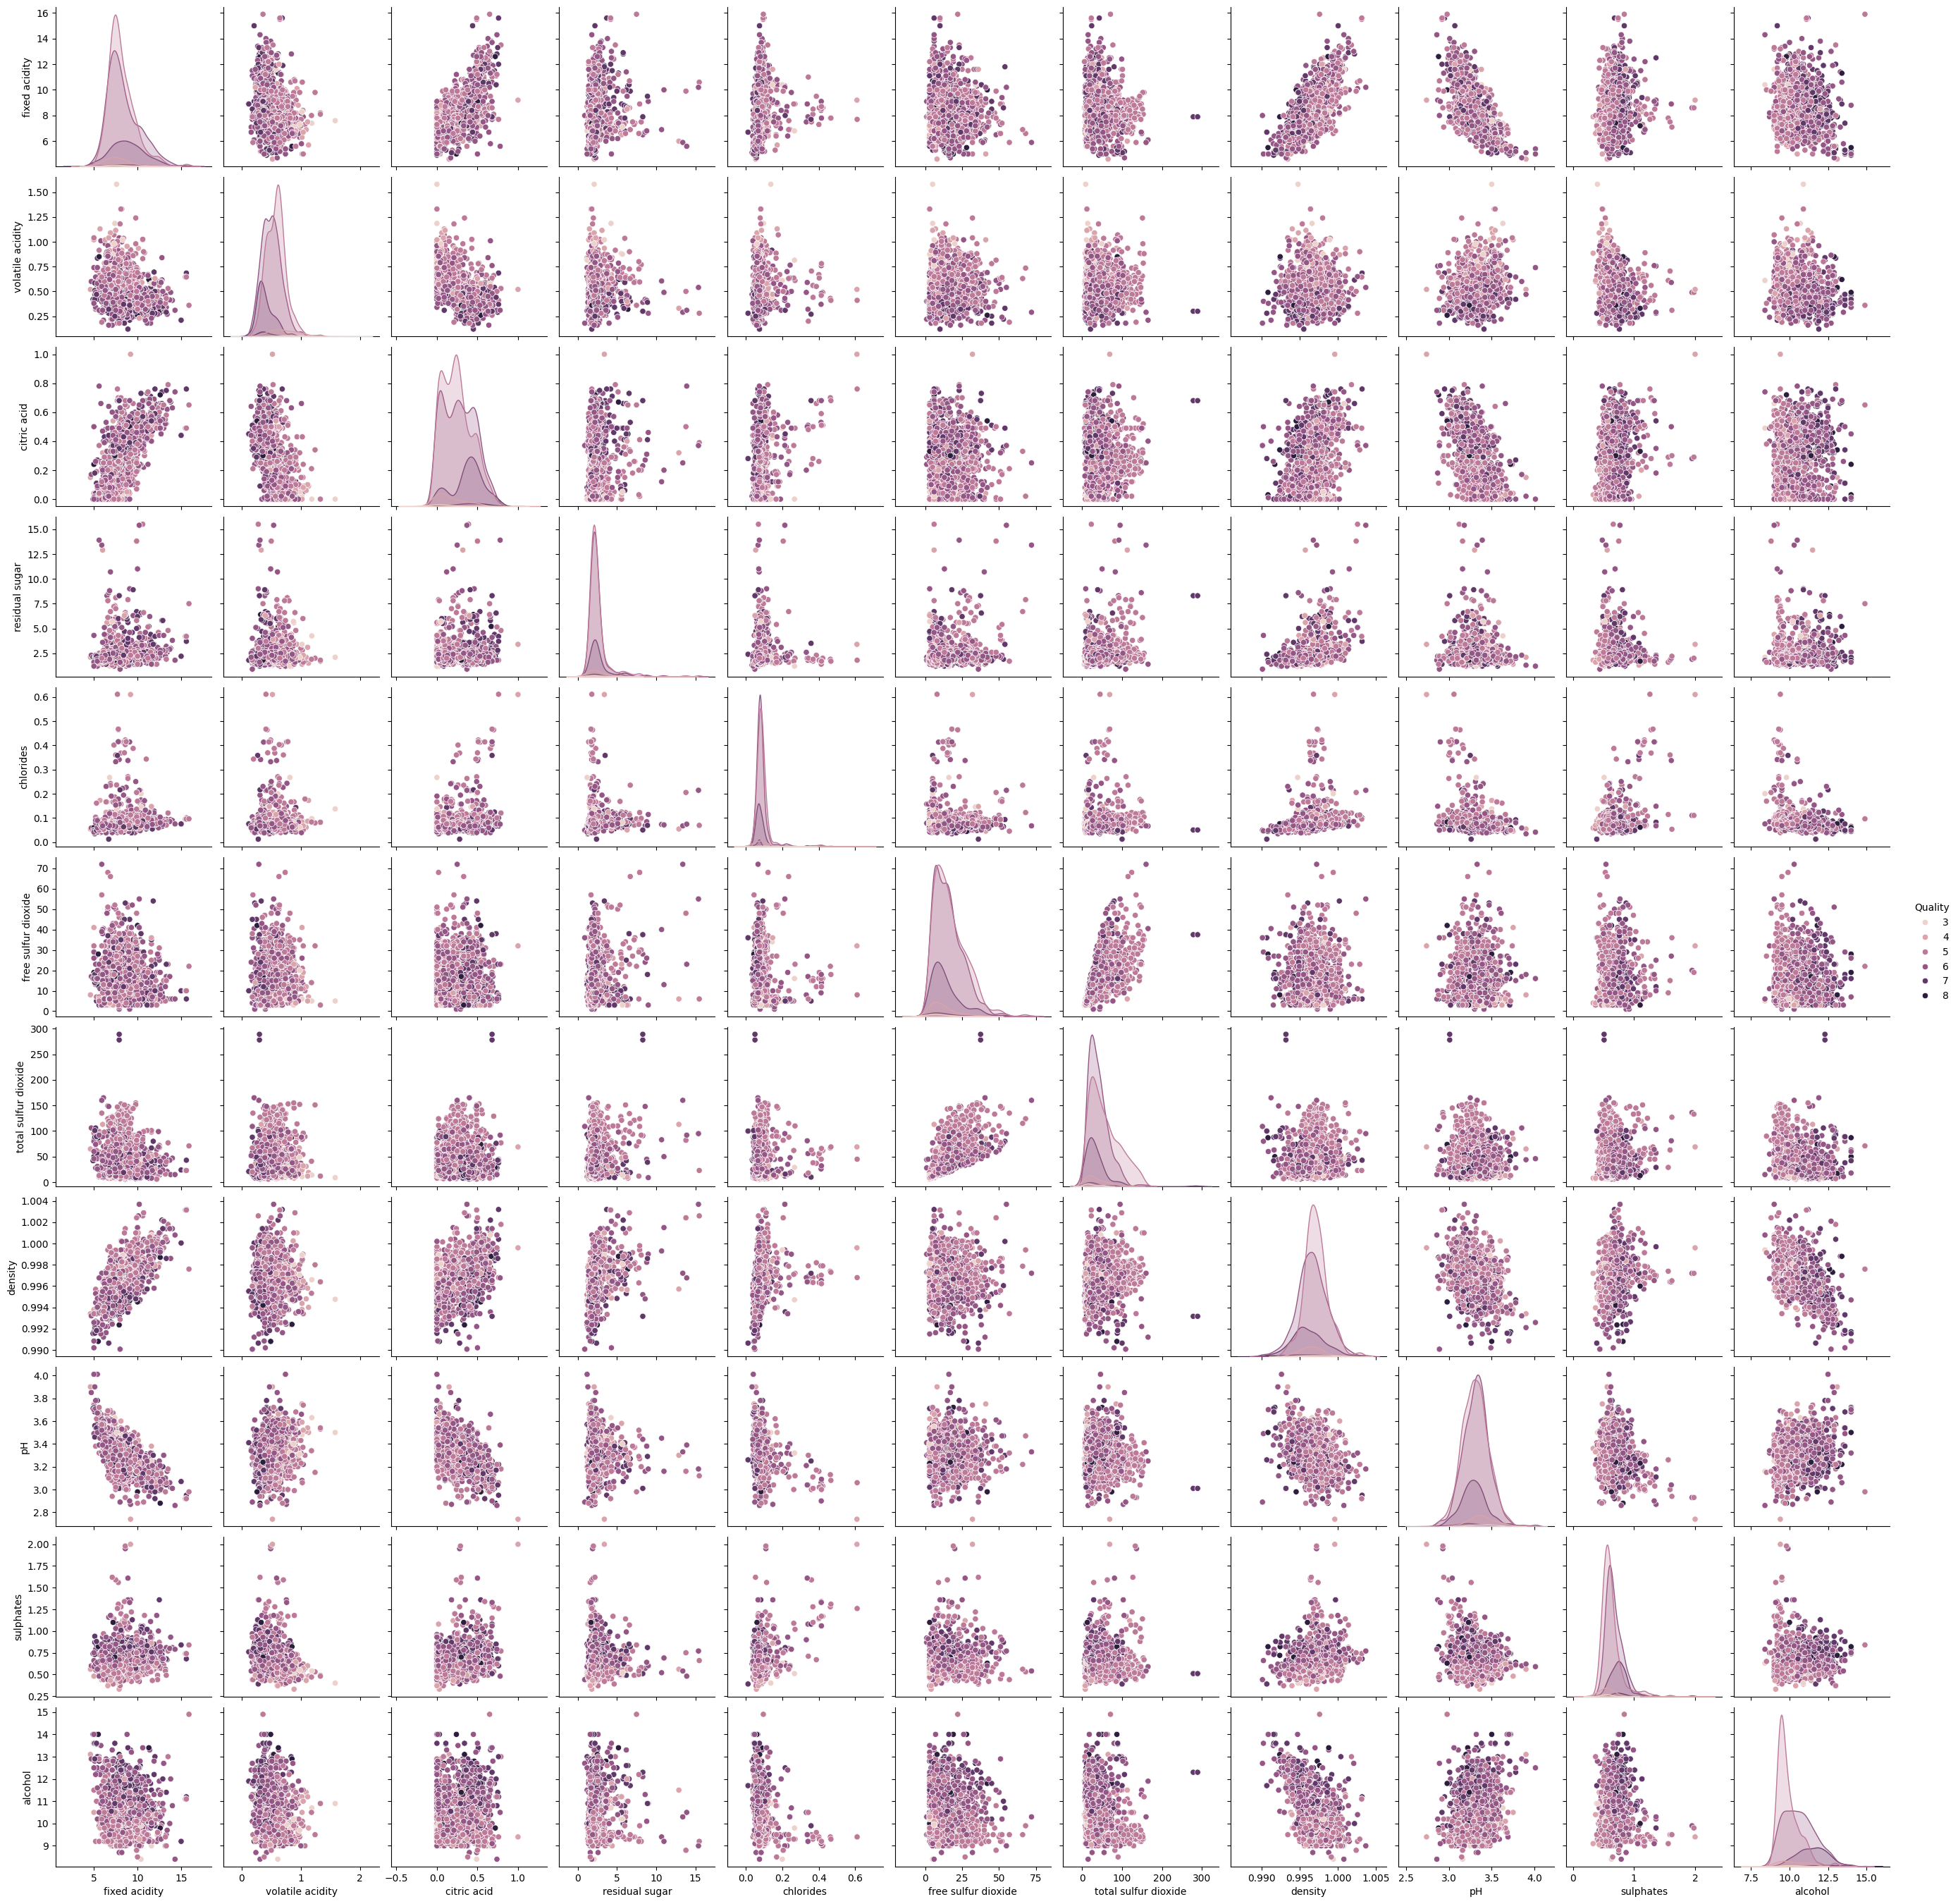

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

pair = sns.pairplot(data, hue="quality")
pair._legend.set_title("Quality")  # Asegura que el título de la leyenda diga "Quality"
plt.show()

<Axes: xlabel='quality', ylabel='count'>

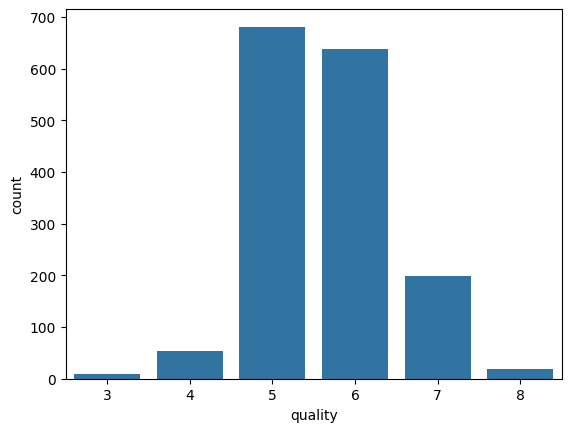

In [351]:
sns.countplot(x="quality", data =data)

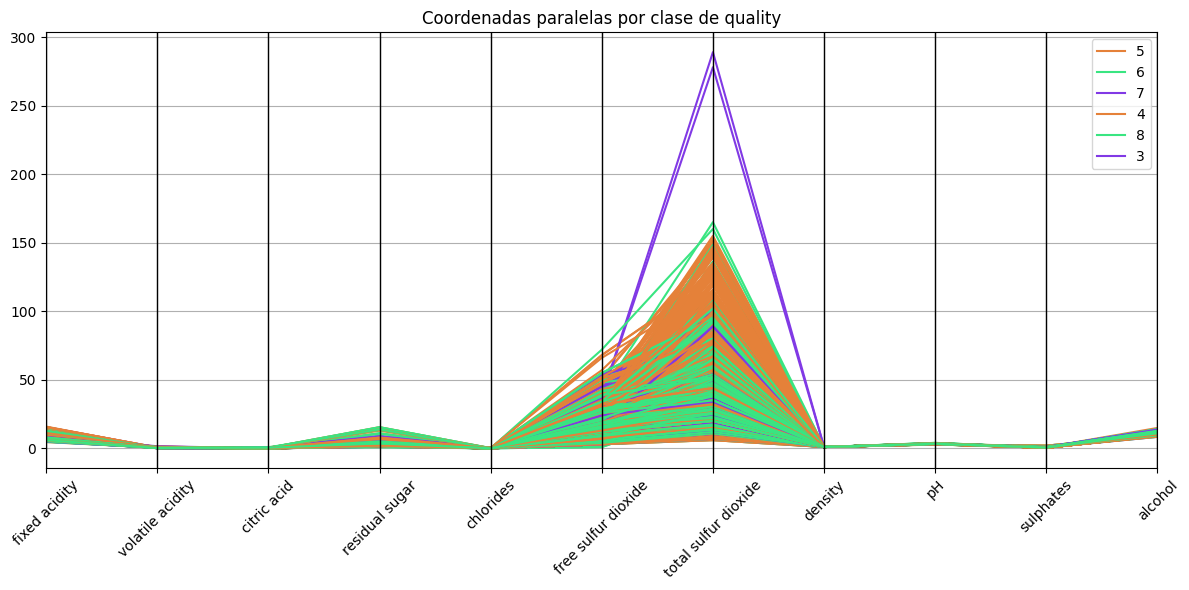

In [352]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Gráfico de coordenadas paralelas
plt.figure(figsize=(12, 6))
parallel_coordinates(data, "quality", color=("#E58139", "#39E581", "#8139E5"))

# Rotar etiquetas de los ejes
plt.xticks(rotation=45)  # Cambia a 90 si quieres más inclinación

# Mostrar gráfico
plt.title("Coordenadas paralelas por clase de quality")
plt.tight_layout()
plt.show()

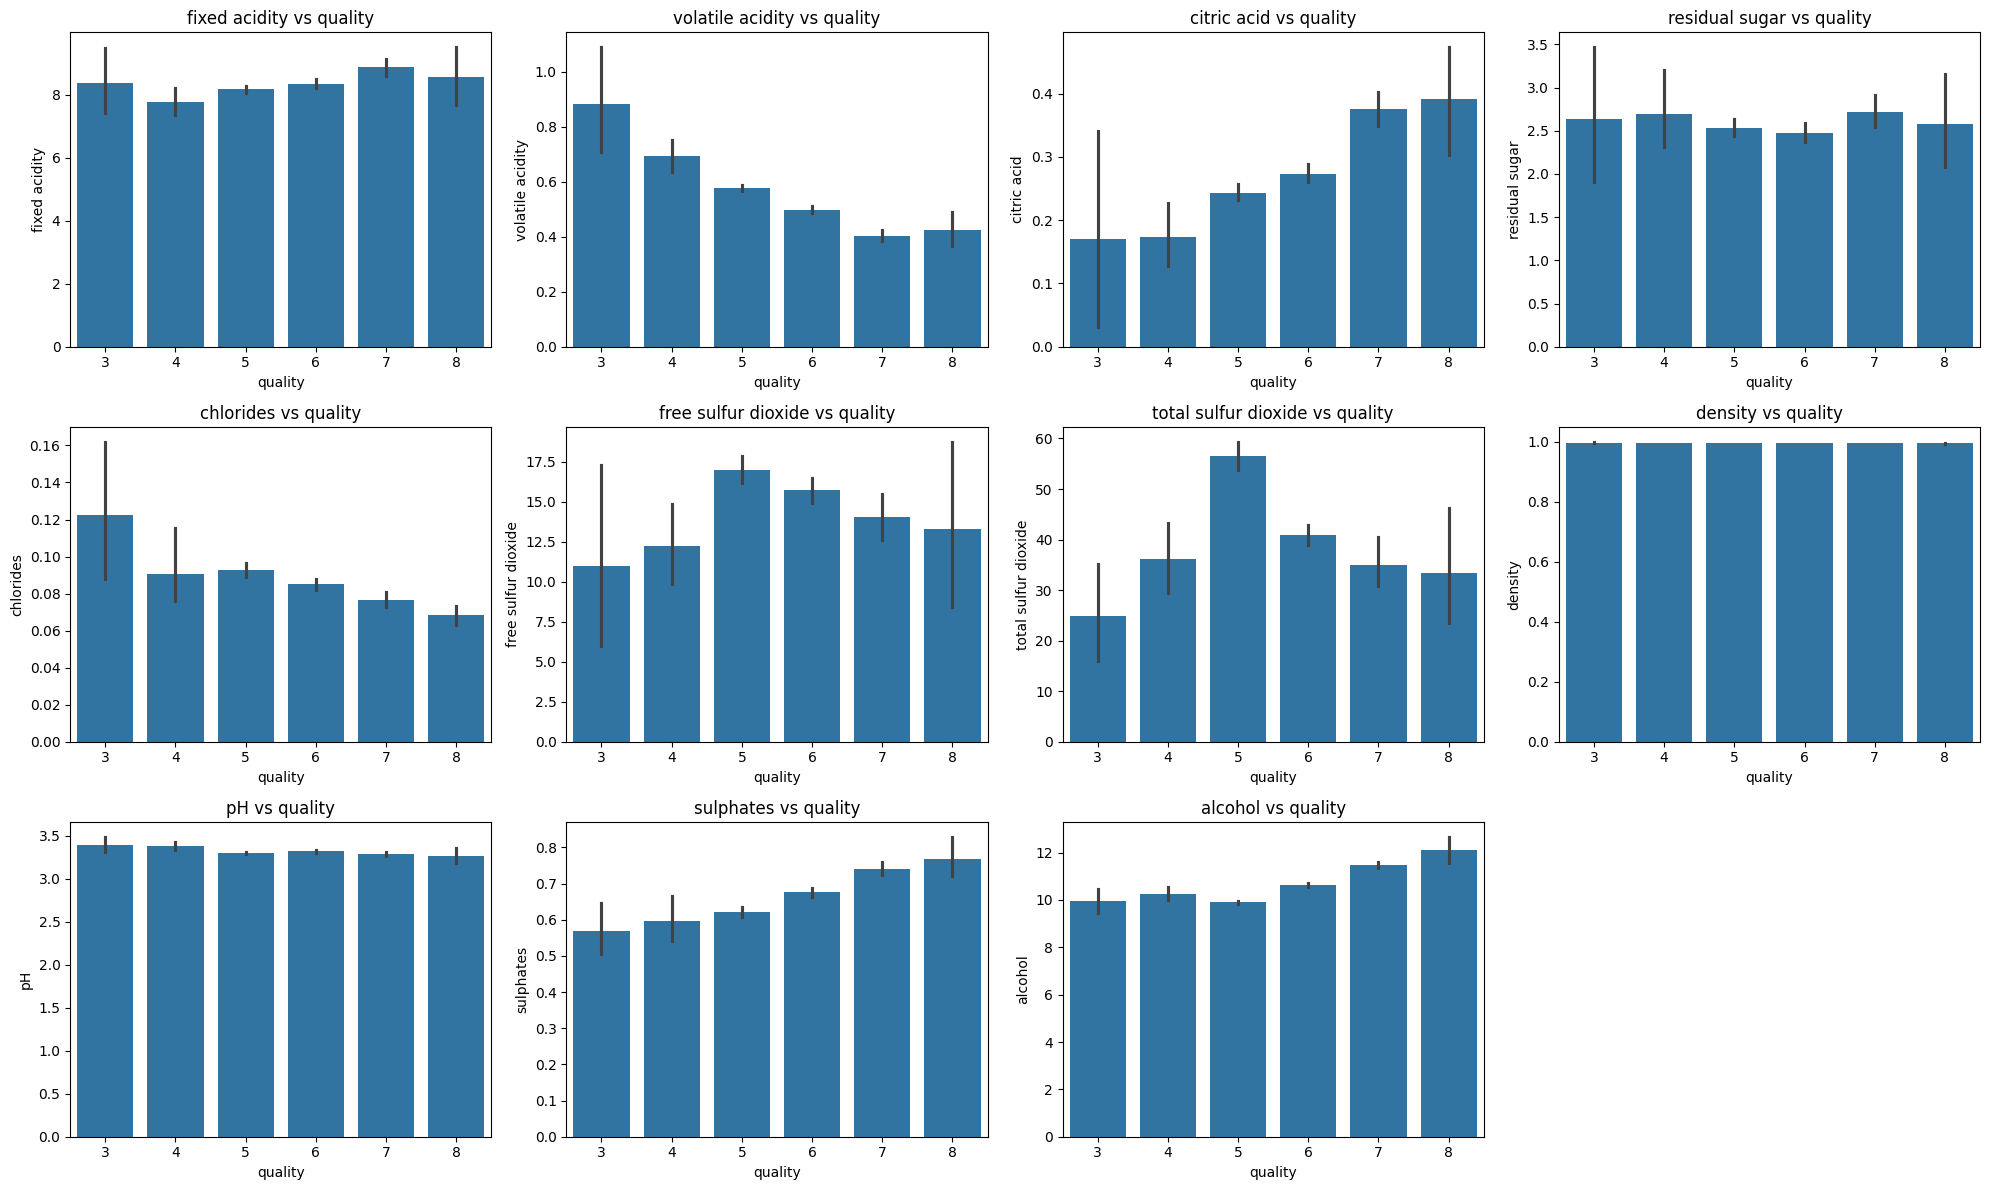

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas
data1 = data.select_dtypes(include=[np.number])

# Eliminar 'quality' si está entre las columnas dependientes
cols_to_plot = [col for col in data1.columns if col != 'quality']

# Definir tamaño de la figura y la cuadrícula
n_cols = 4
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Aplanar ejes para poder indexarlos fácilmente
axes = axes.flatten()

# Generar los gráficos
for i, col in enumerate(cols_to_plot):
    sns.barplot(x='quality', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} vs quality')

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

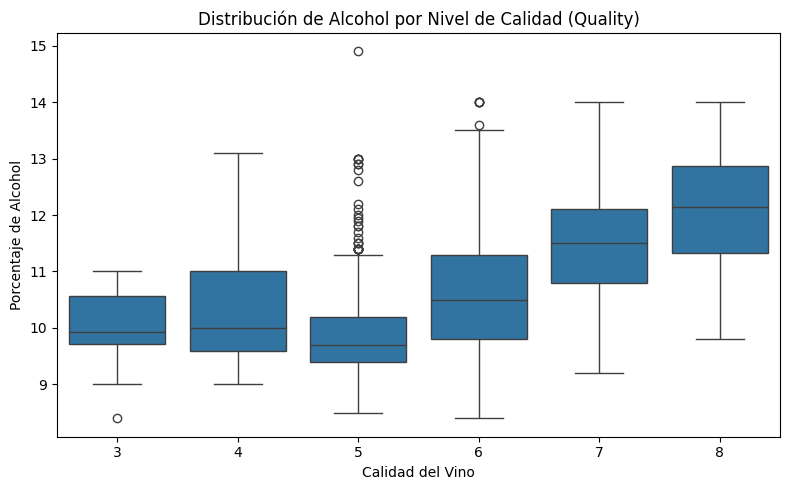

In [354]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Distribución de Alcohol por Nivel de Calidad (Quality)')
plt.xlabel('Calidad del Vino')
plt.ylabel('Porcentaje de Alcohol')
plt.tight_layout()
plt.show()

Como podemos ver existe una relacion clara entre mayores cantidades de alcohol con los vinos de alta calidad.


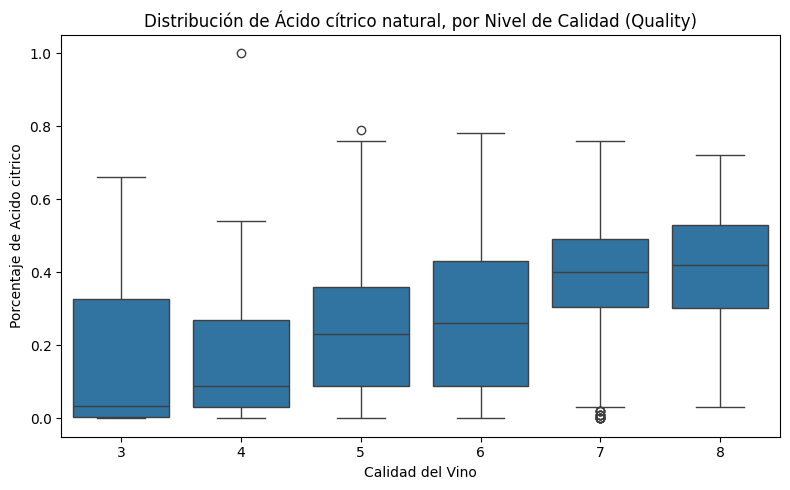

In [355]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='citric acid', data=data)
plt.title('Distribución de Ácido cítrico natural, por Nivel de Calidad (Quality)')
plt.xlabel('Calidad del Vino')
plt.ylabel('Porcentaje de Acido citrico')
plt.tight_layout()
plt.show()

Igualmente la calidad tiene una relacion con el Ácido cítrico natural.

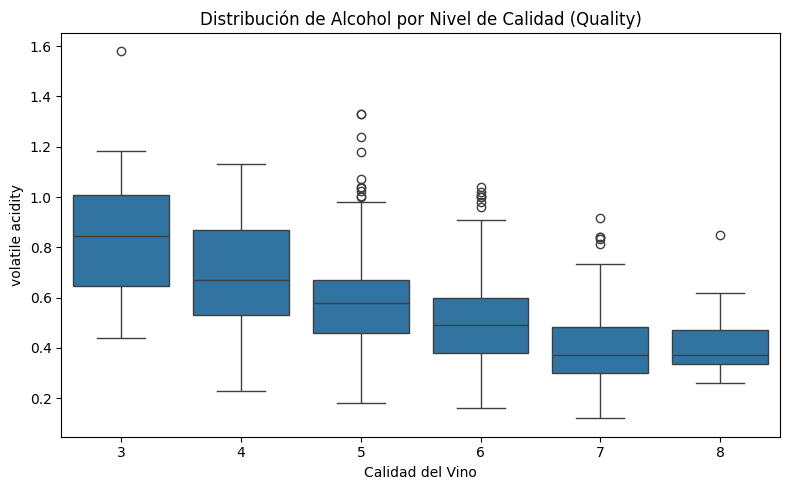

In [356]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='volatile acidity', data=data)
plt.title('Distribución de Alcohol por Nivel de Calidad (Quality)')
plt.xlabel('Calidad del Vino')
plt.ylabel('volatile acidity')
plt.tight_layout()
plt.show()

Existe una relacion negativa de esta variable con el vino de calidad

<Axes: >

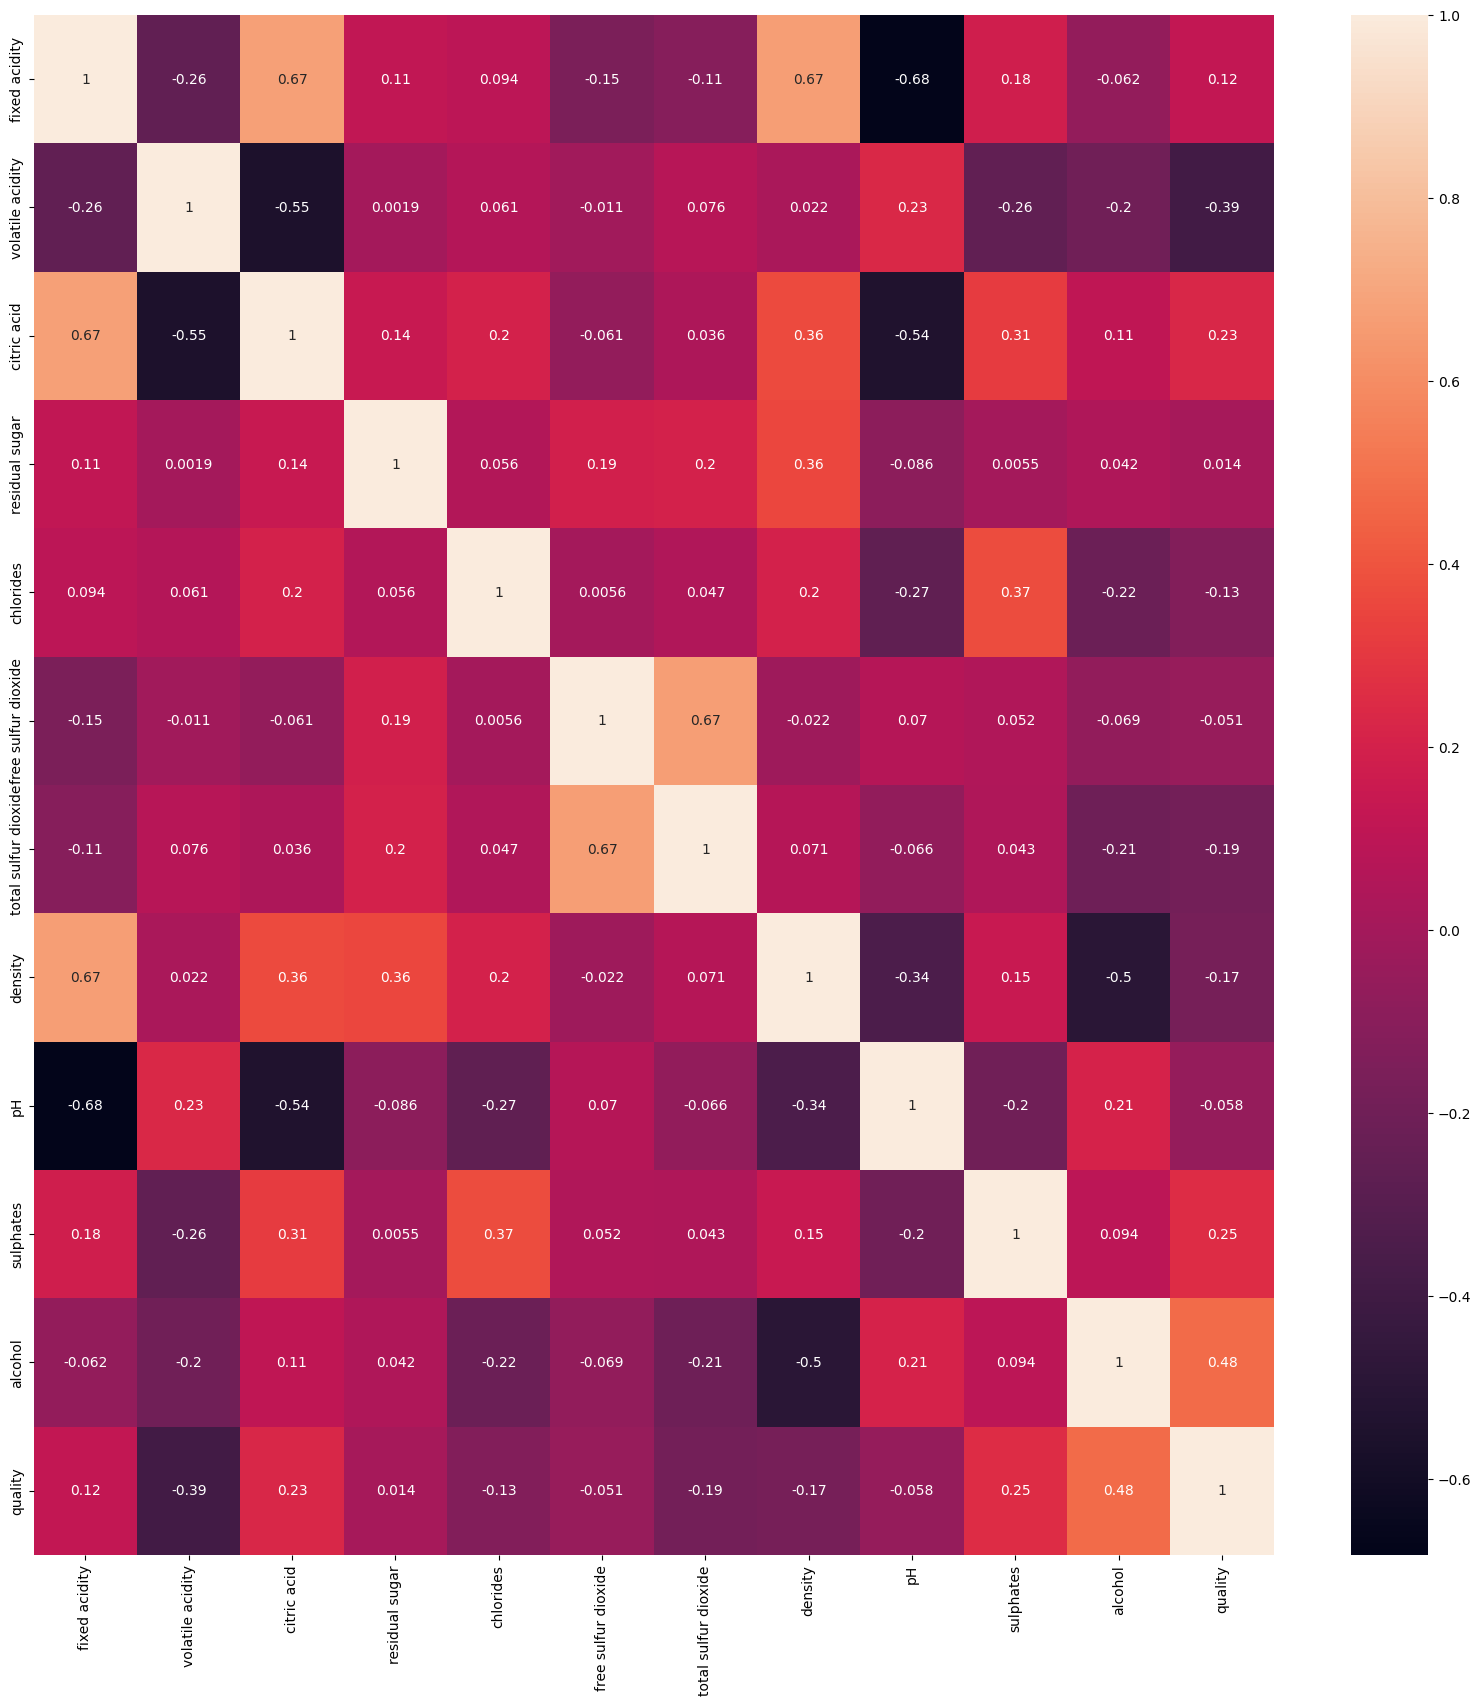

In [357]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), color = "k", annot=True)


# Columna variable objetivo

In [358]:
def categorizar_calidad(q):
    if q <= 5:
        return 0  #  calidad Baja
    elif q == 6:
        return 1  # Calidad media
    else:
        return 2  #  calidad Alta


data["label"] = data["quality"].apply(categorizar_calidad)
print(data["label"].value_counts())

label
0    744
1    638
2    217
Name: count, dtype: int64


In [359]:
data1 = data.copy()
data2 = data.copy()
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  label  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      1  
4      9.4        5      0

# Modelo K-Nearest-Neighbors

In [360]:
from sklearn.model_selection import train_test_split
X = data.drop( columns=["label","quality"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state = 42)


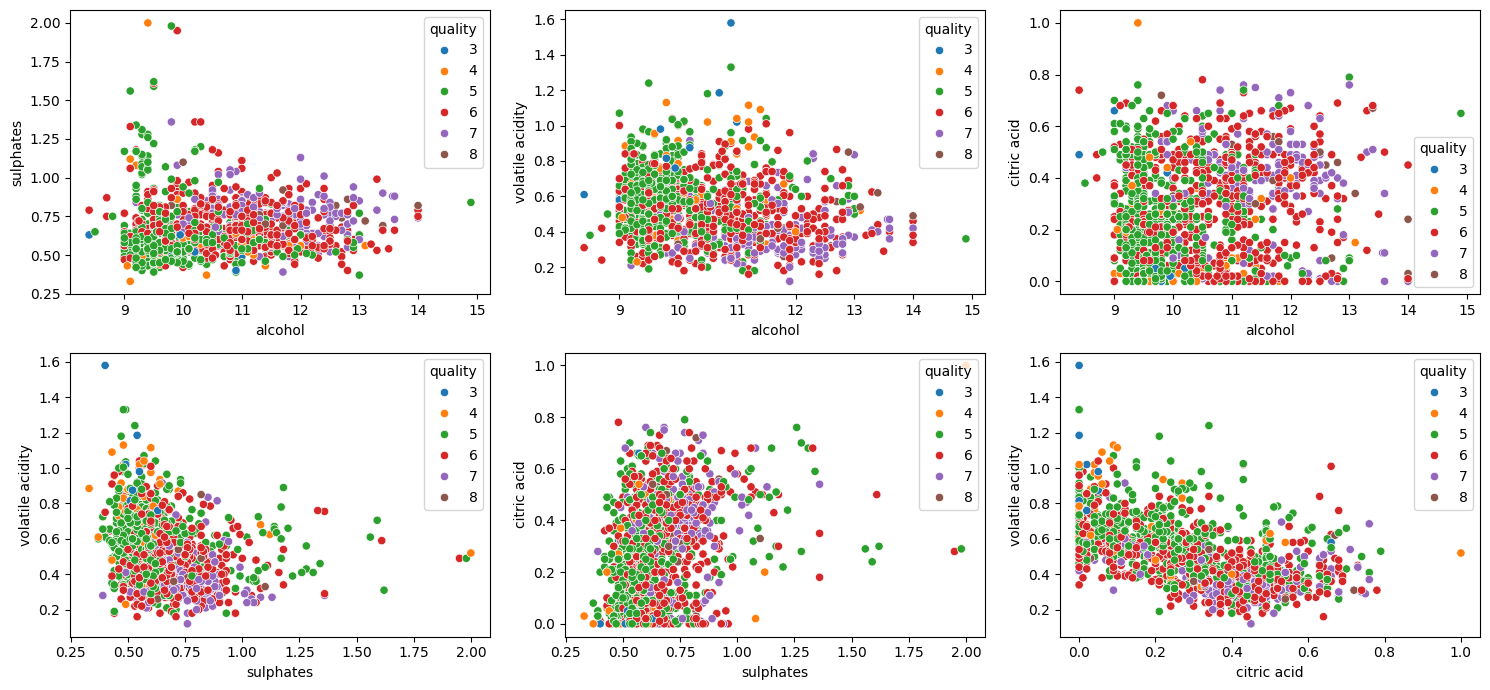

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes (2 filas x 3 columnas)
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Elegir una paleta de colores para más clases de calidad (si hay más de 3)
palette = sns.color_palette("tab10", as_cmap=False, n_colors=data["quality"].nunique())

# Graficar combinaciones clave usando quality como hue
sns.scatterplot(ax=axis[0, 0], data=data, x="alcohol", y="sulphates", hue="quality", palette=palette)
sns.scatterplot(ax=axis[0, 1], data=data, x="alcohol", y="volatile acidity", hue="quality", palette=palette)
sns.scatterplot(ax=axis[0, 2], data=data, x="alcohol", y="citric acid", hue="quality", palette=palette)
sns.scatterplot(ax=axis[1, 0], data=data, x="sulphates", y="volatile acidity", hue="quality", palette=palette)
sns.scatterplot(ax=axis[1, 1], data=data, x="sulphates", y="citric acid", hue="quality", palette=palette)
sns.scatterplot(ax=axis[1, 2], data=data, x="citric acid", y="volatile acidity", hue="quality", palette=palette)

# Ajustar distribución y mostrar
plt.tight_layout()
plt.show()

Como vemos no hay tanta separacion entre clases

In [362]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [363]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2,
       0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [364]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(y_test, y_predict)


0.671875

In [365]:
confusion_matrix(y_test,y_predict)

array([[108,  35,   6],
       [ 39,  79,  10],
       [  3,  12,  28]])

In [366]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       149
           1       0.63      0.62      0.62       128
           2       0.64      0.65      0.64        43

    accuracy                           0.67       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.67      0.67      0.67       320



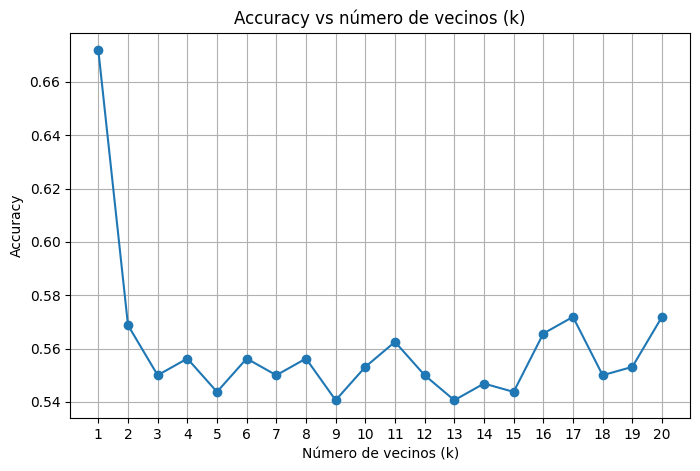

In [367]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies = []

# Probar k de 1 a 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Graficar accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("Accuracy vs número de vecinos (k)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# MODELO BALANCEANDO CLASES

In [368]:

from sklearn.model_selection import train_test_split
X = data1.drop( columns=["label","quality"])
y = data1["label"]

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state = 42)



In [369]:

# 3. Aplicar SMOTE solo al entrenamiento
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [370]:
# 4. Escalar después del resampleo
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # ¡No uses fit en test!

In [371]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


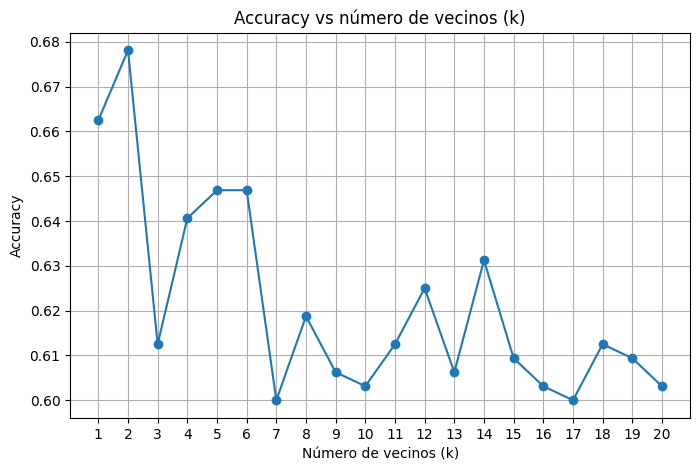

In [372]:
# 6. Graficar Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("Accuracy vs número de vecinos (k)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

In [373]:
# 7. Mostrar matriz de confusión y reporte con el mejor k
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

best_k = np.argmax(accuracies) + 1
print(f"Mejor k: {best_k}")

model_final = KNeighborsClassifier(n_neighbors=best_k)
model_final.fit(x_train_scaled, y_train)
y_final_pred = model_final.predict(x_test_scaled)

print(confusion_matrix(y_test, y_final_pred))
print(classification_report(y_test, y_final_pred))

Mejor k: 2
[[124  22   3]
 [ 45  62  21]
 [  5   7  31]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       149
           1       0.68      0.48      0.57       128
           2       0.56      0.72      0.63        43

    accuracy                           0.68       320
   macro avg       0.65      0.68      0.66       320
weighted avg       0.68      0.68      0.67       320



In [374]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
acc

0.678125

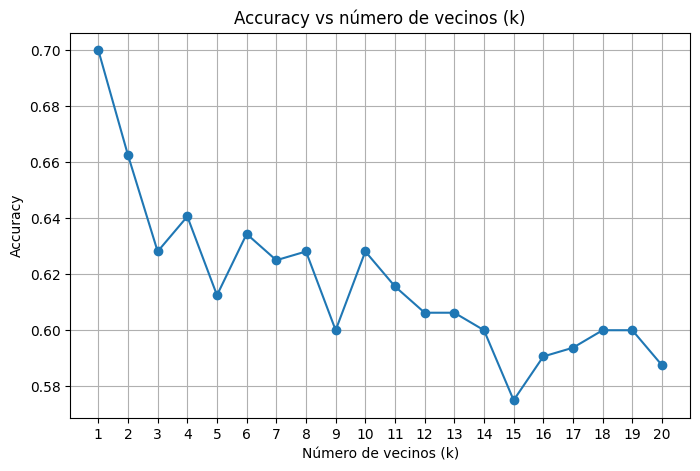

In [375]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Preparar X y y
X = data2.drop(columns=["label", "quality"])
y = data2["label"]

# 2. Transformación logarítmica
X_log = np.log1p(X)  # log(1 + x) para evitar errores con ceros

# 3. Split
x_train, x_test, y_train, y_test = train_test_split(X_log, y, stratify=y, test_size=0.2, random_state=42)

# 4. SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# 5. Escalado
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 6. Entrenar y evaluar KNN
accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 7. Gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("Accuracy vs número de vecinos (k)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()
